In [7]:
import pandas as pd
import sqlite3
import time
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

conn = sqlite3.connect('../sqlite3/qq.db')
cur = conn.cursor()

cur.execute('select * from groupInfo')
groups = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from member')
members = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from message')
messages = pd.DataFrame(list(cur.fetchall()))

USERID = 2728735169
userInfo = members.loc[members[1] == USERID]
userMessage = messages.loc[messages[3] == USERID]

print('3. 单用户分析')
print(f'此次分析的用户是 {userInfo.iloc[0, 2]}, 发言总数 {userMessage.shape[0]} 条, 加入的群有 {userInfo.shape[0]} 组')
print('---- 开始分析 ----')

3. 单用户分析
此次分析的用户是 伍玖, 发言总数 16 条, 加入的群有 2 组
---- 开始分析 ----


In [23]:
groupId = int(userMessage.groupby(2)[2].count().sort_values().keys()[-1])
groupName = groups.loc[groups[0] == groupId].iloc[0, 1]
print(f'最爱发言的群是 {groupName}, 发言数为 {userMessage.groupby(2)[2].count().max()}')

最爱发言的群是 Daser悠着点飞, 发言数为 16


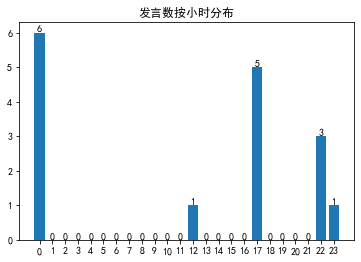

有效性取决于软件开启时间段


In [8]:
messageHourCount = [0] * 24
for message in userMessage.values:
    messageHourCount[time.localtime(message[6]).tm_hour] += 1

chart = plt.bar(range(24), messageHourCount, tick_label=range(24))
plt.bar_label(chart, label_type='edge')
plt.title(f'发言数按小时分布')
plt.show()
print('有效性取决于软件开启时间段')

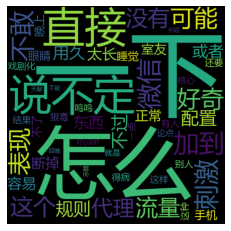

所有记录到的消息的词云图


In [9]:
text = ''
words = []
def handle(matched):
    return ''
for message in userMessage.values:
    text += re.sub('\[CQ.*?\]', handle, message[5])
segs = jieba.lcut(text)
for seg in segs:
    if len(seg) > 1:
        words.append(seg)
cloudPic = WordCloud(font_path='msyh.ttc', width=500, height=500).generate(' '.join(words))
plt.imshow(cloudPic)
plt.axis('off')
plt.show()
print('所有记录到的消息的词云图')